# 演習2 - ショアのアルゴリズム

# 歴史的背景

多くの計算問題は、入力問題の大きさに応じてどのように計算量が増大するかで、アルゴリズムの性能を測ります。例えば、足し算のアルゴリズムは、足す数字の大きさに応じて線形に計算量が増大しますが、中には入力の大きさに応じて計算量が指数関数的に成長するものもあります。こうした指数関数的に計算量が増大する計算問題は、地球上のどのコンピューターを使っても解けないほど大きくなることがあります。インターネットのセキュリティは、現実的な時間内では解決できない計算問題が存在することによって担保されています。

1994年、ピーター・ショアは、量子コンピューター上で整数を効率的に素因数分解できることを示しました。[1]　これは大きなニュースです。 というのも、この問題を解く最良の古典アルゴリズムは、指数関数的に成長するアルゴリズムのひとつだからです。実際、[RSA暗号](https://en.wikipedia.org/wiki/RSA_(cryptosystem))は、ある一定以上の大きな数を素因数分解することが不可能であることに依存しています。

現在の古典的なコンピューターには大きすぎる整数を素因数分解するには、何百万もの量子ビットとゲートが必要になりますが、これらの回路は現在の量子コンピューターで正常に動作させるには大きすぎます。

では、Lieven M.K. Vandersypen、Matthias Steffen、Gregory Breyta、Costantino S. Yannoni、Mark H. Sherwood、Isaac L. Chuangは、2001年に量子コンピューターによる15の因数分解をどうやって成功させたのでしょうか？[2]

ショアのアルゴリズムの回路を作る上での課題は、制御された$ay \bmod N$を計算する回路を作ることです。多項式のゲート数で回路を作る方法は分かっていますが、現在のコンピューターでは大きすぎます。幸いなことに、問題に関する情報が事前にわかっていれば、ちょっと「ズル」をしてより効率的な回路を作ることができる場合があります。

上記の論文の著者は、他の多くの科学的進歩に加えて、$7y \bmod 15$を実行する非常にシンプルな回路を発見しました。これにより、彼らのハードウェアで動作させるのに十分な大きさの回路ができました。今回のIBM Quantum Challengeが終わる頃には、ショアのアルゴリズムに使用する$35y \bmod N$の回路を作成し、`ibmq_santiago`上で動作させていることでしょう。

この課題で行われていることをより厳密に理解したい場合は、[Qiskit Textbook のショアのアルゴリズムの章](https://qiskit.org/textbook/ja/ch-algorithms/shor.html)を読むことをオススメしますが、そちらを参照せずに課題を完了することもできます。

### 参考文献
1. Shor, Peter W. "Algorithms for quantum computation: discrete logarithms and factoring." Proceedings 35th annual symposium on foundations of computer science. Ieee, 1994.
1. Vandersypen, Lieven MK, et al. "Experimental realization of Shor's quantum factoring algorithm using nuclear magnetic resonance." Nature 414.6866 (2001): 883-887.

# ショアのアルゴリズムの概要

[量子位相推定法](https://qiskit.org/textbook/ja/ch-algorithms/quantum-phase-estimation.html)というアルゴリズムは、ある量子状態にゲートをかけることで適用される位相を求めてくれます。位相推定アルゴリズムの入力は、状態$|1\rangle$とゲート$Z$であり、Z$ゲート$が状態$|1\rangle$に作用すると、同じ状態に$\pi$のグローバルな位相が追加された状態になります。

$$
Z|1\rangle = -|1\rangle = e^{i\pi} |1\rangle
$$

量子位相推定アルゴリズムがこれを解くための手法を提供します。別の例を[こちら](https://qiskit.org/textbook/ja/ch-algorithms/quantum-phase-estimation.html#example_t_gate)で見ることができます。

ショアは、$U|y\rangle = |a y\bmod N\rangle$という振る舞いをするゲート$U$に対して位相推定を行うと、$N$の因子についての情報がすぐに得られることを示しました。

# 練習問題

この課題では、$13y \bmod 35$を実装した回路で位相推定を行い、35を因数分解します。これを実現する回路を作り、しかも `ibmq_santiago` で実行できるほど小さくすることが課題となります。これは簡単なことではないので、まず最初にちょっとした「ズル」をしておきます。

ショアのアルゴリズムは、初期量子状態$|1\rangle$に$U$を適用して到達できる状態でのみ動作すればよいので、このような動作をする回路であれば、どんな回路でも良いということです。

$$
\begin{aligned}
U|1\rangle &= |13\rangle \\
UU|1\rangle &= |29\rangle \\
UUU|1\rangle &= |27\rangle \\
UUUU|1\rangle &= |1\rangle \\
\end{aligned}
$$

では、上記を簡単に行うにはどうすればよいのでしょうか。4つの異なる量子状態を正しく変換すればよいのですから、これを2量子ビットにエンコードすればよいことになります。今回の課題では、2量子ビットの計算基底の状態を、次のように数字にマッピングすることにします：

$$
\begin{aligned}
|1\rangle &\rightarrow |00\rangle \\
|13\rangle &\rightarrow |01\rangle \\
|29\rangle &\rightarrow |10\rangle \\
|27\rangle &\rightarrow |11\rangle \\
\end{aligned}
$$

なぜこれが「ズル」なのでしょう？なぜなら、この最適化を利用するためには、$U$が影響を与える状態をすべて「知っておく」必要があるからです。つまり、再び1に戻るまで$ay \bmod N$を計算して、$a^x \bmod N$の周期を把握しておくことで、$N$の因子を得ることができます。このように、$r$の値がわかるような情報を使って最適化することは、古典的なコンピューターでは解決できない問題には当然対応できません。

しかし、この課題の目的は、あくまで、ショアのアルゴリズムが意図したとおりに動作することを検証することであり、$U$の回路を得るためにちょっとしたズルを行ったという事実を気にするつもりはありません。


<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Exercise 2a:** 下記の変換を行い、別の量子ビットによって制御される回路($U$)を作成してください。この回路は'target'という名前の2量子ビットのターゲットレジスタに作用し、'control'という名前の別の1量子ビットのレジスタによって制御されます。完成した回路を変数'`cu`'に割り当ててください。


$$
\begin{aligned}
U|00\rangle &= |01\rangle \\
U|01\rangle &= |10\rangle \\
U|10\rangle &= |11\rangle \\
U|11\rangle &= |00\rangle \\
\end{aligned}
$$

In [1]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

# コードを記入ください - 開始
cu.ccx(c[0],t[0],t[1])
cu.cx(c[0],t[0])
# コードを記入ください - 終了

cu.draw('mpl')

C:\Users\AyumuShiraishi\Anaconda3\envs\qiskit\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\AyumuShiraishi\Anaconda3\envs\qiskit\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\AyumuShiraishi\Anaconda3\envs\qiskit\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


<Figure size 369.62x284.278 with 1 Axes>

以下のセルを実行して、答えを確認しましょう。

In [2]:
# 以下のコードで回答を確認しましょう
from qc_grader import grade_ex2a
grade_ex2a(cu)

Grading your answer for ex2/part1. Please wait...

Congratulations 🎉! Your answer is correct.


おめでとうございます！難しい部分を見事クリアされました。

位相推定アルゴリズムの出力は量子ビットを測定して読み取るので、'counting'レジスタに$r$を読み取るのに十分な量子ビットが含まれていることを確認する必要があります。ここでは、$r=4$なので、$\log_2(4) = 2$個の量子ビットがあればよいことになります（$r$を事前に知っているのでここでもちょっとズルしています）が、Santiagoには5個の量子ビットがあり、 'target'レジスターには2量子ビットしか使っていないので、残りの3量子ビットをカウントレジスターとして使います。

$U$の位相推定を行うためには、$n$個の計数レジスターの各量子ビット（添字が$x$）に対して、$U^{2^x}$（$U$を$2^x$回繰り返す）を実行する回路を作る必要があります。ここでは、以下の3つの回路が必要になります：

$$ U, \; U^2, \; \text{and} \; U^4 $$

そこで次は、$U^2$を実行する回路（つまり、$U$を2回適用することに相当する回路）を作ります。

<div class="alert alert-block alert-success">

**Exercise 2b:** 下記の変換を行い、別の量子ビットによって制御される回路($U^2$)を作成してください。この回路は'target'という名前の2量子ビットのターゲットレジスタに作用し、'control'という名前の別の1量子ビットのレジスタによって制御されます。完成した回路を変数'`cu2`'に割り当ててください。

$$
\begin{aligned}
U|00\rangle &= |10\rangle \\
U|01\rangle &= |11\rangle \\
U|10\rangle &= |00\rangle \\
U|11\rangle &= |01\rangle \\
\end{aligned}
$$

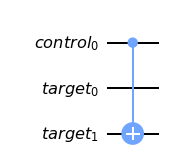

In [3]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# コードを記入ください - 開始
cu2.cx(c[0],t[1])
# コードを記入ください - 終了

cu2.draw('mpl')

以下のセルを実行して、答えを確認しましょう。

In [4]:
# 以下のコードで回答を確認しましょう
from qc_grader import grade_ex2b
grade_ex2b(cu2)

Grading your answer for ex2/part2. Please wait...

Congratulations 🎉! Your answer is correct.


最後に、$U$を4回適用することに相当する回路も必要です(つまり、$U^4$という回路が必要です)。   


<div class="alert alert-block alert-success">
    
**Exercise 2c:** 下記の変換を行い、別の量子ビットによって制御される回路($U^4$)を作成してください。この回路は'target'という名前の2量子ビットのターゲットレジスタに作用し、'control'という名前の別の1量子ビットのレジスタによって制御されます。完成した回路を変数'`cu4`'に割り当ててください。ヒント：最適解はシンプルです。

$$
\begin{aligned}
U|00\rangle &= |00\rangle \\
U|01\rangle &= |01\rangle \\
U|10\rangle &= |10\rangle \\
U|11\rangle &= |11\rangle \\
\end{aligned}
$$
</div>

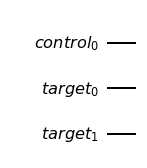

In [5]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# コードを記入ください - 開始
# コードを記入ください - 終了

cu4.draw('mpl')

以下のセルを実行して、答えを確認しましょう。

In [6]:
# 以下のコードで回答を確認しましょう
from qc_grader import grade_ex2c
grade_ex2c(cu4)

Grading your answer for ex2/part3. Please wait...

Congratulations 🎉! Your answer is correct.


<div class="alert alert-block alert-success">

**Exercise 2 final:** これで$U$, $U^2$, $U^4$を制御できるようになったので、これらを組み合わせてショアのアルゴリズムの量子部分を実行する回路を作ることができます。

初期化は簡単です。カウントレジスタを$|{+}{+}{+}\rangle$の状態にし（3つのHゲートで可能です）、ターゲットレジスタを$|1\rangle$の状態にします（計算基底の状態$|00\rangle$にマッピングしたので、ここでは何もする必要はありません）。ここまでの部分はこちらで作っておきます。

あなたの仕事は、初期化と逆量子フーリエ変換の間に使用される、制御された$U$を実行する回路を作ることです。より正確に記述すると、以下の回路を作っていただきたいと思います。

$$
CU_{c_0 t}CU^2_{c_1 t}CU^4_{c_2 t}
$$

ここで、$c_0$、$c_1$、$c_2$は'counting'レジスタの3つの量子ビット、$t$は'target'レジスタ、$U$はこの課題の最初の部分で<a href="#u-definition">定義したとおりです</a>。この表記では、$CU_{a b}$は、$CU$が$a$によって制御され、$b$に作用することを意味します。この問題を解決する簡単な方法は、上で作成した回路 `cu`, `cu2`, `cu4` を単純に組み合わせることですが、おそらく同じ動作をするより効率的な回路を見つけることができるでしょう。

</div>
<div class="alert alert-block alert-danger">
    
作成される回路には、[CNOT](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html)と1量子ビットゲート[U-gates](https://qiskit.org/documentation/stubs/qiskit.circuit.library.UGate.html)しか使用できません。多量子ビットゲートは、1量子ビットゲートに比べて、ハードウェア上で実行するのが難しいため、あなたのスコアは使用したCNOTの数になります（少なければ少ないほどよい）。この条件の対応に戸惑いそうであれば、回路をこの形式に変換するコードを提出書類の横に記載しています。ただ、手計算の方が恐らくうまくいくでしょう。
    
</div>

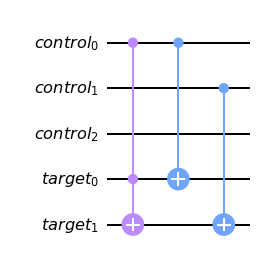

In [7]:
# これまでのソリューションを最終的な提出物にまとめるためのコード
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

In [8]:
# 以下のコードで回答を確認しましょう
from qc_grader import grade_ex2_final
# 回路をCNOTや1量子ビットゲートに変換する必要がある場合は、以下の2行をアンコメントしてください。
from qiskit import transpile
cux = transpile(cux, basis_gates=['cx','u'])
grade_ex2_final(cux)

Grading your answer for ex2/part4. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 6.
Feel free to submit your answer.



最終的に回路を提出する時は以下のコードでSubmitください。

In [ ]:
# 回答を提出してください。チャレンジ期間中であれば何度でも再提出は可能です。
from qc_grader import submit_ex2_final
submit_ex2_final(cux)

おめでとうございます！あなたはこのチャレンジを終えました。あなたが作成した回路で、35を素因数分解されるのをみてみましょう。

## 作成した回路で35を素因数分解する

以下のコードセルは、あなたが提出した課題をもとに、$\tfrac{s}{r}$を得るための回路を作成します。ここでは$s$は$0$ と $r-1$間のランダムな整数であり、$r$は$f(x) = 13^x \bmod 35$の周期になります。

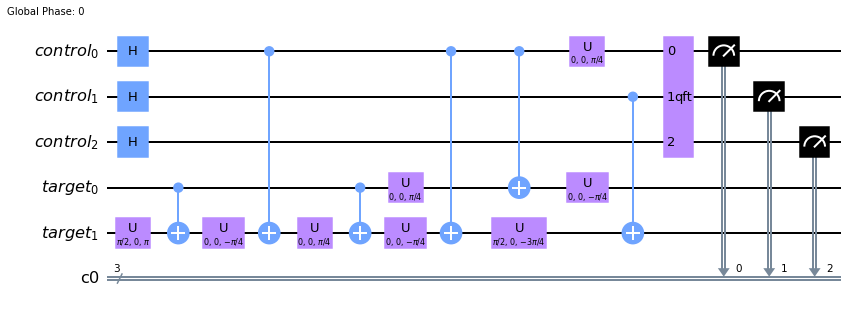

In [9]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
# 回路オブジェクトの作成
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)

# 量子ビットの初期化
shor_circuit.h(cqr)

# 回路の追加
shor_circuit = shor_circuit.compose(cux)

# inverse QFT で出力を抽出
shor_circuit.append(QFT(3, inverse=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

この回路をトランスパイルして、回路がどのくらいの大きさで、何個のCNOTを使っているのか見てみましょう。

In [10]:
from qiskit import Aer, transpile, assemble
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(shor_circuit, basis_gates=['u', 'cx'], optimization_level=3)
print(f"circuit depth: {tqc.depth()}")
print(f"Circuit contains {tqc.count_ops()['cx']} CNOTs")

circuit depth: 27
Circuit contains 15 CNOTs


結果をみてみましょう。

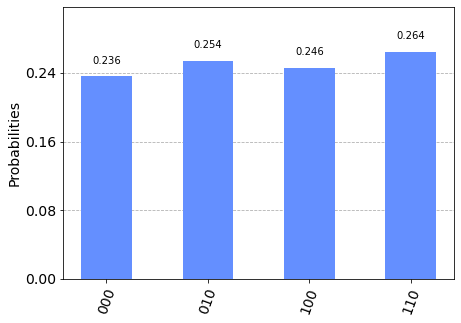

In [11]:
counts = qasm_sim.run(tqc).result().get_counts()
plot_histogram(counts)

すべてが正しく動作した場合は、 $0$, $2$, $4$, $8$ の数字を等確率で測定することができるはずです。 これは、位相推定によって、 $2^n \cdot \tfrac{s}{r}$ が得られるからです。 ここで、 $n$はカウントレジスタの量子ビット数（ここでは、$n = 3$, $s$ は$0$ から$r-1$の間のランダムな整数、 $r$は計算しようとしている数）です。これを、$s/r$を表す分数に変換してみましょう（これは古典的に簡単に計算できるものです）。

In [12]:
from fractions import Fraction
n = 3  # nは`counting`レジスタの量子ビットの数
# 各測定ストリングを循環させる
for measurement in counts.keys():
    # バイナリ文字列を`int`に変換して、2^nで割る
    decimal = int(measurement, 2)/2**n
    # 続分数のアルゴリズムを使用して、a/bの形式に変換します
    print(Fraction(decimal).limit_denominator())

3/4
1/2
0
1/4


いくつかの結果の分母を見れば、正解の $r = 4$ がわかることがわかります。すぐに $r=4$ を検証することができます。

In [13]:
13**4 % 35

1

では、ここからどうやって因数を求めたらよいでしょうか。$N$と$a^{r/2}-1$または$a^{r/2}+1$の最大公約数が$N$の因数である可能性が高く、最大公約数も古典的に簡単に計算できることがわかりました。

In [14]:
from math import gcd # greatest common divisor
for x in [-1, 1]:
    print(f"Guessed factor: {gcd(13**(4//2)+x, 35)}")

Guessed factor: 7
Guessed factor: 5


1つの因数を見つければよく、それを使って$N$を割ることでもう1つの因数を見つけることができます。しかし、この場合は、 $a^{r/2}-1$ と $a^{r/2}+1$ のどちらも $35$ の因数を与えてくれます。これが正しいかどうか、もう一度検証してみましょう。

In [15]:
7*5

35

## `ibmq_santiago` での実行

Santiago上で動作いただくことを冒頭で約束したので、ここではその方法を紹介します。この例では、便宜上Santiagoをシミュレーションしたデバイスを使用していますが、必要に応じて実際のデバイスに切り替えることができます。

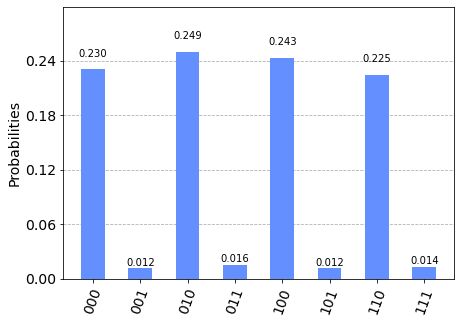

In [16]:
from qiskit.test.mock import FakeSantiago
from qiskit import assemble
from qiskit.visualization import plot_histogram
santiago = FakeSantiago()
real_device = False

## 実機でコードを走らせるときは以下のコメントアウトを解除
#from qiskit import IBMQ
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#santiago = provider.get_backend('ibmq_santiago')
#real_device = True

# Santiago上での実行のために回路をトランスパイルする
tqc = transpile(shor_circuit, santiago, optimization_level=3)

if not real_device:
    tqc = assemble(tqc)

# 回路の実行とカウントの表示
counts = santiago.run(tqc).result().get_counts()
plot_histogram(counts)

スコアが十分に低ければ、完璧なシミュレーションで見たように、0$、2$、4$、8$を測定する確率が高いことがわかります。プロセッサの不正確さや量子ビットと相互作用する不要なもののために、いくつかの余分な結果が表示されます。この「ノイズ」は、回路が長くなればなるほど悪化します。計算時間が長くなればなるほど、不要な相互作用の時間が長くなり、ゲート数が増えれば増えるほど、潜在的なエラーが増えるからです。そのため、できるだけ小さな回路を作るためにズルをする必要がありました。


近い将来、私たちの量子システムは、これらの問題を克服するために、より高度なエラー抑制技術を使い始めることができるまでに改善されるでしょう。そうなれば、[ズルをせずにショアのアルゴリズムを実行できる](https://arxiv.org/pdf/quant-ph/0205095.pdf)ほどの大規模な回路を走らせることができるようになります。

## Additional information

**Created by:** Frank Harkins

**Version:** 1.0.0